# V-10 flight simulation
This notebook is being developed by the avionics and flight dynamics sub-teams in The Rocket Launchers student organization at the University of Texas Rio Grande Valley. Our rocket's name is V-10 in celebration of our club's 10th anniversary! V-10 will be competing in the 10k COTS division at IREC. 

Key features of V-10:
- Air brakes
- vonKarman Nose Cone
- Replaceable fins


In [6]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, TrapezoidalFins, EllipticalFins, RailButtons, NoseCone, Tail, Parachute
import datetime


## Environment


In [ ]:
env = Environment()
env.set_location(latitude=28.61, longitude=-80.6)
env.set_elevation(1402.0800000000002)


Optionally, you can set the date and atmospheric model


In [ ]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
# env.set_atmospheric_model(type='Forecast', file='GFS')

In [ ]:
env.all_info()


## Motor
We are using an Aerotech M2500T

We are using thrust info from here <https://www.thrustcurve.org/motors/AeroTech/M2500T/>

  	This File 	Certified 	±
Diameter 	98 mm 	98 mm 	=
Length 	732 mm 	751 mm 	−3%
Prop. Weight 	4,711 g 	4,711 g 	=
Total Weight 	8,064 g 	8,064 g 	=
Avg. Thrust 	2,488.0 N 	2,500.0 N 	=
Max. Thrust 	4,080.5 N 	3,710.9 N 	+10%
Total Impulse 	9,055.9 Ns 	9,671.0 Ns 	−6%
Burn Time 	3.6 s 	3.9 s 	−5%

In [ ]:
m2500t = SolidMotor(
    thrust_source='/Users/luis/Projects/Python/RL-RocketPy-Notebook/data/AeroTech_M2500T.eng',
    dry_mass=3.353,  # Total 8.064 kg - Propellant 4.711 kg per cell 8
    center_of_dry_mass_position=0,
    dry_inertia=[0, 0, 0],
    grains_center_of_mass_position=0,
    grain_number=1,
    # Set density to match 4.711 kg propellant mass given geometry
    grain_density=1137.5,
    grain_outer_radius=0.049,  # 98 mm diameter
    grain_initial_inner_radius=0.0245,
    grain_initial_height=0.732,  # Length per cell 8
    grain_separation=0,
    nozzle_radius=0.036750000000000005,
    nozzle_position=-0.351,
    throat_radius=0.0245,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method='linear',
    coordinate_system_orientation='nozzle_to_combustion_chamber',
)

Nozzle Details
Nozzle Radius: 0.036750000000000005 m
Nozzle Throat Radius: 0.0245 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1173.1466429429975 kg/m3
Grain Outer Radius: 0.049 m
Grain Inner Radius: 0.0245 m
Grain Height: 0.732 m
Grain Volume: 0.004 m3
Grain Mass: 4.858 kg

Motor Details
Total Burning Time: 3.9021 s
Total Propellant Mass: 4.858 kg
Structural Mass Ratio: 0.408
Average Propellant Exhaust Velocity: 1864.107 m/s
Average Thrust: 2320.807 N
Maximum Thrust: 4080.53093197668 N at 2.40567201759911 s after ignition.
Total Impulse: 9056.021 Ns



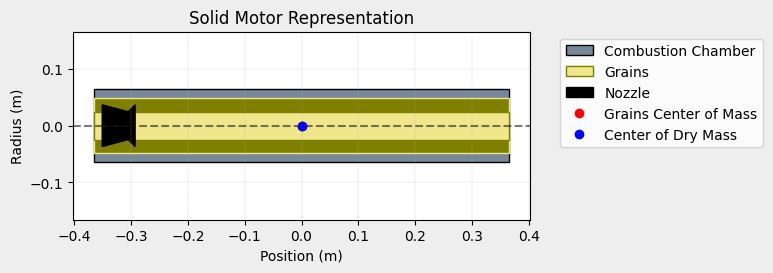

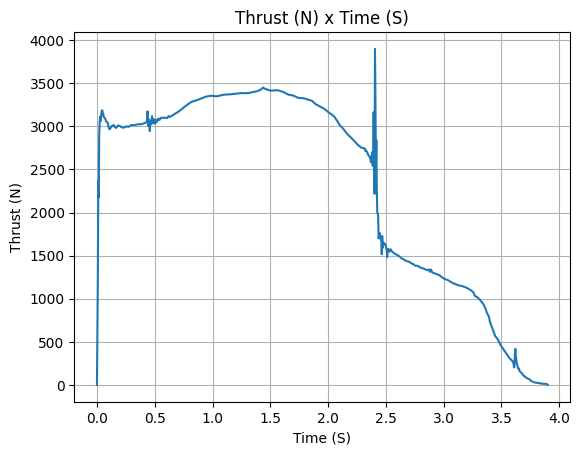

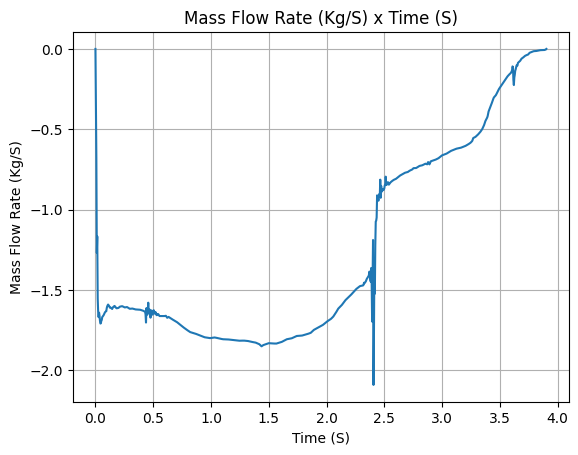

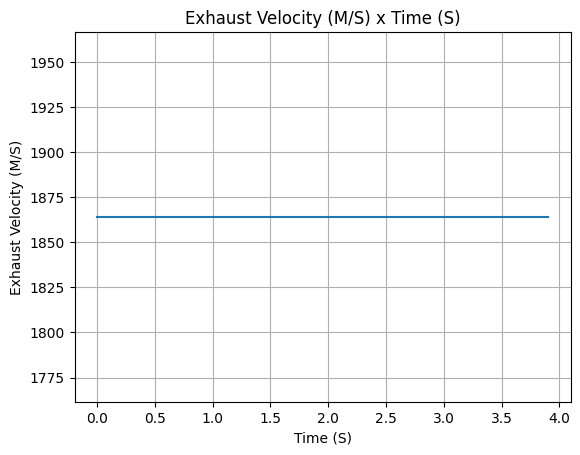

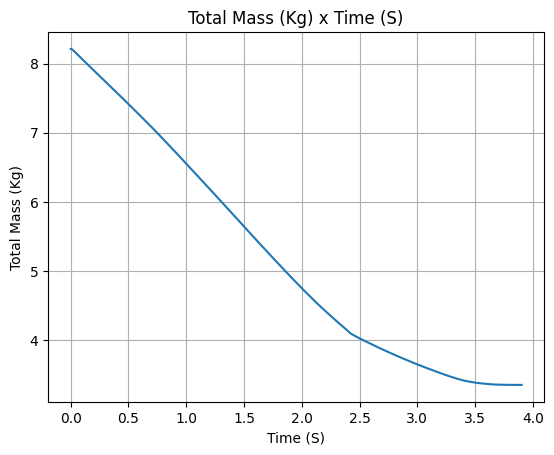

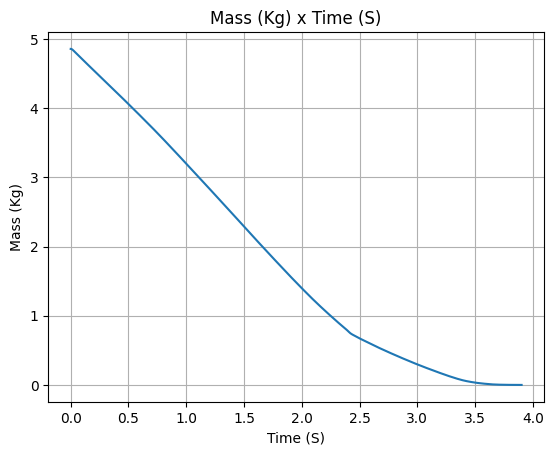

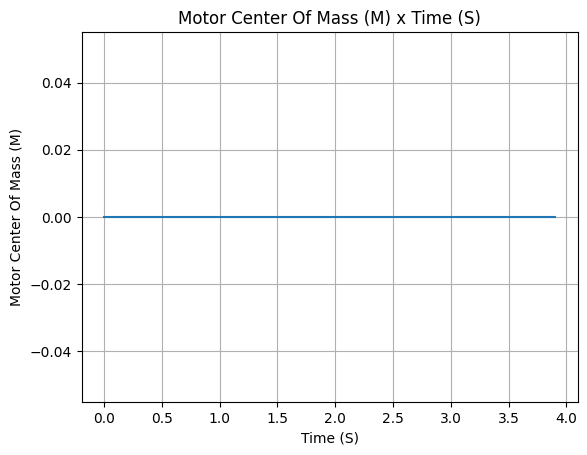

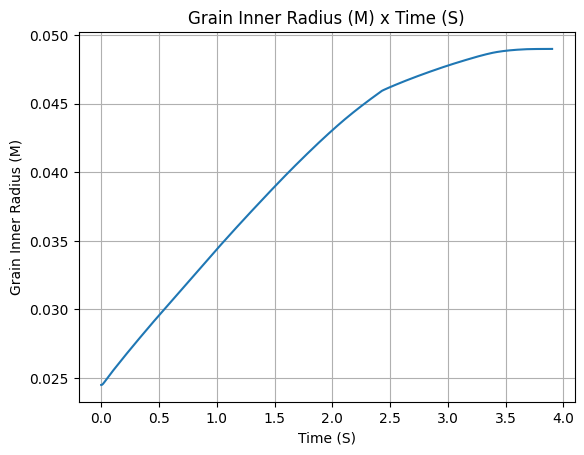

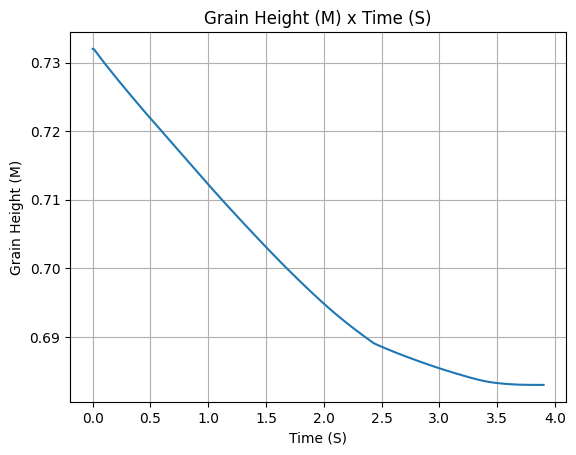

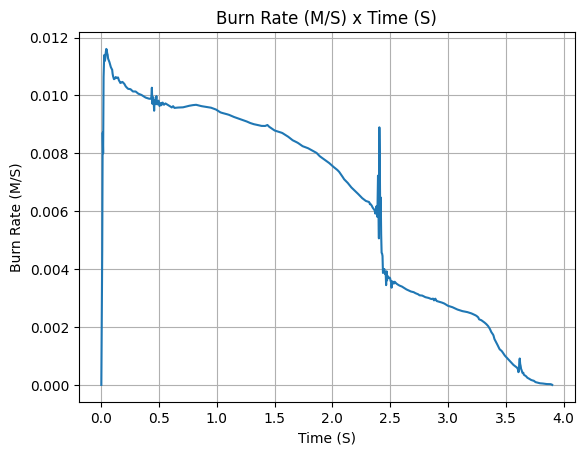

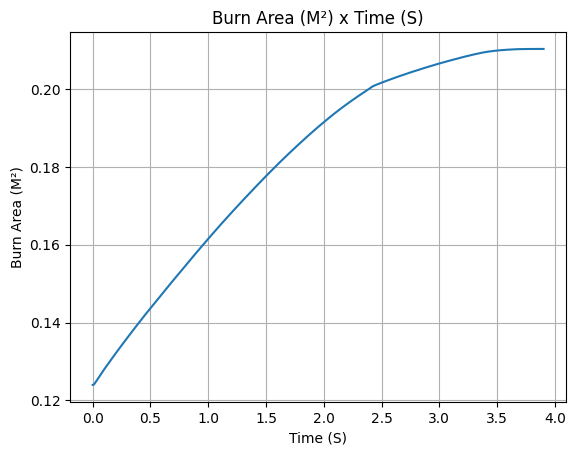

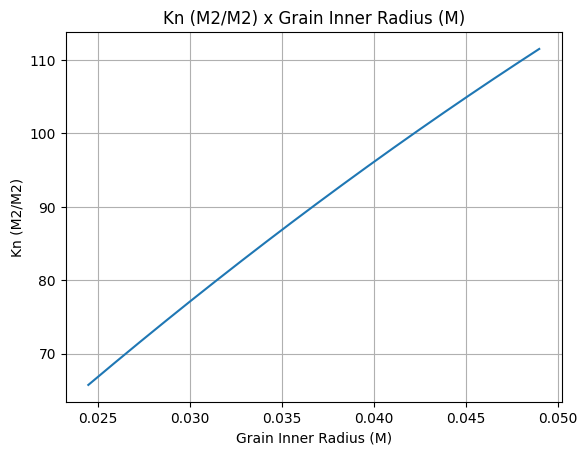

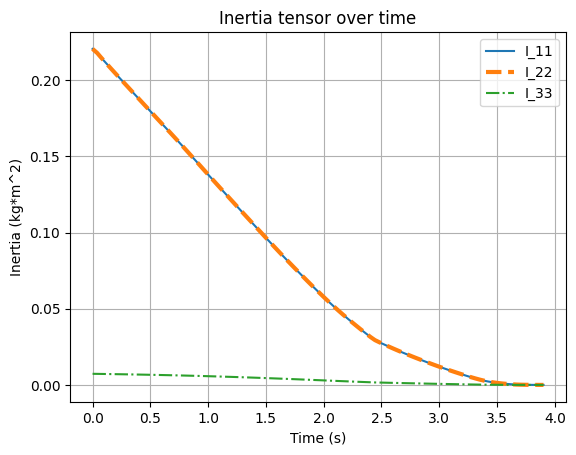

In [8]:
m2500t.all_info()


## Rocket
Currently, only single stage rockets are supported by Rocket-Serializer
We will start by defining the aerodynamic surfaces, and then build the rocket.


### Nosecones


In [ ]:
nosecone = NoseCone(
    length=0.3809999999999999,
    kind='Von Karman',
    base_radius=0.0777875,
    rocket_radius=0.0777875,
    name='0.3809999999999999',
)


### Fins
As rocketpy allows for multiple fins sets, we will create a dictionary with all the fins sets and then add them to the rocket


In [ ]:
# No fins were added to the rocket. Check parameters.json.

### Transitions (Tails)
As rocketpy allows for multiple tails, we will create a dictionary with all the tails and then add them to the rocket


In [ ]:
tails = {}


In [ ]:
tails[0] = Tail(
    top_radius=0.0777875,
    bottom_radius=0.06349999999999999,
    length=0.0508,
    rocket_radius=0.0777875,
    name='Transition',
)


### Parachutes
As rocketpy allows for multiple parachutes, we will create a dictionary with all the parachutes and then add them to the rocket


In [ ]:
parachutes = {}


In [ ]:
parachutes[0] = Parachute(
    name='Main Parachute + Bag',
    cd_s=13.003,
    trigger=396.240,
    sampling_rate=100, 
)


In [ ]:
parachutes[1] = Parachute(
    name='Drogue',
    cd_s=0.642,
    trigger='apogee',
    sampling_rate=100, 
)


In [ ]:
rocket = Rocket(
    radius=0.0777875,
    mass=28.271,
    inertia=[0.115, 0.115, 21.424],
    power_off_drag='drag_curve.csv',
    power_on_drag='drag_curve.csv',
    center_of_mass_without_motor=1.476,
    coordinate_system_orientation='nose_to_tail',
)


### Adding surfaces to the rocket
Now that we have all the surfaces, we can add them to the rocket


In [ ]:
rocket.add_surfaces(surfaces=[nosecone, tails[0]], positions=[0.0, 2.8964])

In [ ]:
rocket.add_motor(m2500t, position= 2.4727773722627746)


Adding parachutes to the rocket


In [ ]:
rocket.parachutes = list(parachutes.values())


### Rail Buttons


In [ ]:
rail_buttons = rocket.set_rail_buttons(
   upper_button_position=2.762,
   lower_button_position=3.776,
   angular_position=60.000,
)


In [ ]:
### Rocket Info
rocket.all_info()


## Flight
We will now create the flight simulation. Let's go!


In [ ]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=5.1816,
    inclination=90.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)

In [ ]:
flight.all_info()
